In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("../data/Food_Inspections.csv")
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2492889,Kozminski,Kozminski,31151.0,School,Risk 1 (High),936 E 54th St (5400S),CHICAGO,IL,60615.0,03/15/2021,Canvass,Pass,NaN,41.798029,-87.602463,"(-87.60246286753599, 41.798029497076946)"
1,2484532,VOLARE,VOLARE,2141813.0,Restaurant,Risk 1 (High),201 E GRAND AVE,CHICAGO,IL,60611.0,02/04/2021,Non-Inspection,No Entry,NaN,41.891652,-87.622604,"(-87.62260381408842, 41.89165221441017)"
2,2472891,MIMI'S TACOS,MIMI'S TACOS,2766681.0,Restaurant,Risk 1 (High),570-572 W ROOSEVELT RD,CHICAGO,IL,60607.0,01/20/2021,License,Not Ready,NaN,41.867330,-87.642117,"(-87.64211742912265, 41.86733048241842)"
3,2472503,WESTERN CAFE,WESTERN CAFE,2487565.0,Restaurant,Risk 1 (High),5710 N WESTERN AVE,CHICAGO,IL,60659.0,01/11/2021,Canvass,Out of Business,NaN,41.985362,-87.689652,"(-87.68965150838075, 41.9853615288893)"
4,2472385,HILLTOP FAMILY RESTAURANT,HILLTOP FAMILY RESTAURANT,2652370.0,Restaurant,Risk 1 (High),2800 W FOSTER AVE,CHICAGO,IL,60625.0,01/07/2021,Non-Inspection,No Entry,NaN,41.975927,-87.699046,"(-87.69904568571212, 41.97592670619184)"


In [33]:
data.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [34]:
data.describe()

,Inspection ID,License #,Zip,Latitude,Longitude
count,2.214680e+05,2.214510e+05,221416.000000,220712.000000,220712.000000
mean,1.556559e+06,1.640888e+06,60628.772523,41.881141,-87.676613
std,6.715937e+05,9.057123e+05,115.146304,0.081074,0.058608
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428
25%,1.199511e+06,1.270938e+06,60614.000000,41.833535,-87.707657
50%,1.547236e+06,2.002919e+06,60625.000000,41.892094,-87.666534
75%,2.145307e+06,2.289163e+06,60643.000000,41.939873,-87.634955
max,2.521547e+06,9.999999e+06,60827.000000,42.021064,-87.525094


In [35]:
data.isnull().sum()

Inspection ID          0
DBA Name               2
AKA Name            2481
License #             17
Facility Type       4913
Risk                  71
Address                0
City                 167
State                 55
Zip                   52
Inspection Date        0
Inspection Type        1
Results                0
Violations         59251
Latitude             756
Longitude            756
Location             756
dtype: int64

In [36]:
categorical_cols=data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:\n",data[col].value_counts())


DBA Name:
 DBA Name
SUBWAY                       3007
DUNKIN DONUTS                1629
MCDONALD'S                    628
7-ELEVEN                      477
CHIPOTLE MEXICAN GRILL        357
                             ... 
THE GREAT AMERICAN CHEESE       1
EL SECRE                        1
DIP & FLIP                      1
JUICE & SALAD BAR, LLC          1
Al's Beef & Nancy's Pizza       1
Name: count, Length: 29164, dtype: int64

AKA Name:
 AKA Name
SUBWAY                   3695
DUNKIN DONUTS            1601
7-ELEVEN                  902
MCDONALD'S                851
BURGER KING               454
                         ... 
NACHO 8 (#544)              1
VONG'S THAI KITCHEN         1
GORDITAS TONALA, INC.       1
Wing Wah Lau                1
GO GO WHITE SOX             1
Name: count, Length: 27743, dtype: int64

Facility Type:
 Facility Type
Restaurant                      147712
Grocery Store                    28722
School                           13749
Children's Services Faci

<function matplotlib.pyplot.show(close=None, block=None)>

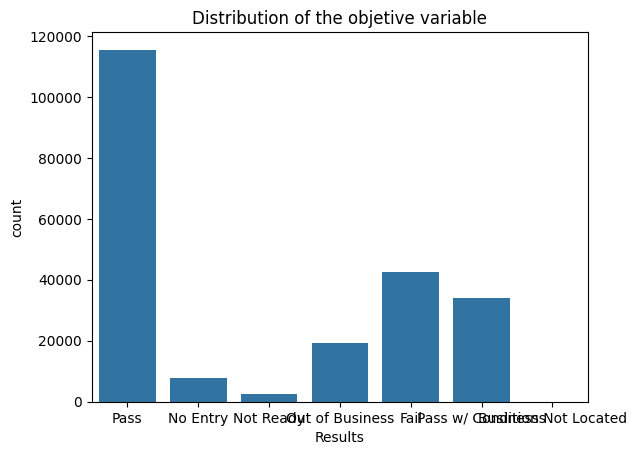

In [37]:
import seaborn as sns
sns.countplot(data,x='Results')
plt.title('Distribution of the objetive variable')
plt.show

## Data processed

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [39]:
data=data.drop(columns=['Inspection ID','DBA Name','AKA Name','Address','City', 'State', 'Location','Inspection Date'])
data.head()

,License #,Facility Type,Risk,Zip,Inspection Type,Results,Violations,Latitude,Longitude
0,31151.0,School,Risk 1 (High),60615.0,Canvass,Pass,NaN,41.798029,-87.602463
1,2141813.0,Restaurant,Risk 1 (High),60611.0,Non-Inspection,No Entry,NaN,41.891652,-87.622604
2,2766681.0,Restaurant,Risk 1 (High),60607.0,License,Not Ready,NaN,41.867330,-87.642117
3,2487565.0,Restaurant,Risk 1 (High),60659.0,Canvass,Out of Business,NaN,41.985362,-87.689652
4,2652370.0,Restaurant,Risk 1 (High),60625.0,Non-Inspection,No Entry,NaN,41.975927,-87.699046


In [40]:
data=data.dropna()

In [41]:
label_encoder=LabelEncoder()
data['Results']=label_encoder.fit_transform(data['Results'])
data=pd.get_dummies(data,columns=['Facility Type','Risk','Inspection Type'])
data.head()

,License #,Zip,Results,Violations,Latitude,Longitude,Facility Type_(convenience store),Facility Type_(gas station),Facility Type_1005 NURSING HOME,Facility Type_1023,...,Inspection Type_TASK FORCE PACKAGE LIQUOR,Inspection Type_TASKFORCE,Inspection Type_TAVERN 1470,Inspection Type_TWO PEOPLE ATE AND GOT SICK.,Inspection Type_Tag Removal,Inspection Type_Task Force Liquor 1475,Inspection Type_expansion,Inspection Type_sfp/complaint,Inspection Type_task force,Inspection Type_task force(1470) liquor tavern
15,1095992.0,60639.0,0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.913999,-87.745864,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,2749790.0,60641.0,0,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.942579,-87.747114,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,2749481.0,60614.0,0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.927051,-87.668359,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,28024.0,60618.0,0,15. FOOD SEPARATED AND PROTECTED - Comments: O...,41.942154,-87.712446,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42,1985411.0,60654.0,4,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.887556,-87.634118,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
X=data.drop(columns=['Results'])
y=data['Results']


vectorizer = CountVectorizer(max_features=100)  # Ajusta el número de características si es necesario
violations_vectorized = vectorizer.fit_transform(data['Violations'].fillna("")).toarray()
violations_df = pd.DataFrame(violations_vectorized, columns=vectorizer.get_feature_names_out())

# Añadir los datos procesados al dataframe original y eliminar la columna de texto
X = X.drop(columns=['Violations']).reset_index(drop=True)
X = pd.concat([X, violations_df], axis=1)

#Train set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
#Scaled numerical category
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Training Model

In [44]:
from sklearn.linear_model import LogisticRegression

#create model
model=LogisticRegression()
model.fit(X_train,y_train)

/home/alex/Trabajo/MachineLearning_models/classification/Logistic_regresion/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation_Model

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Predictions
y_pred=model.predict(X_test)

In [46]:
#Accuaracy
accuaracy=accuracy_score(y_test,y_pred)
print(f"Accuaracy to model:{accuaracy:.2f}")

Accuaracy to model:0.90


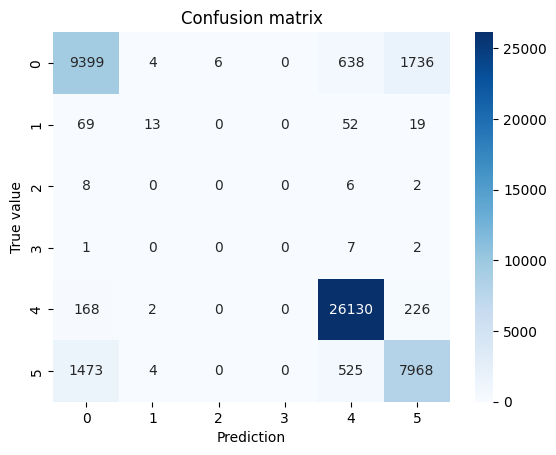

In [47]:
#Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion matrix")
plt.xlabel("Prediction")
plt.ylabel("True value")
plt.show()

In [48]:
# Inform Classification
print("informe de clasificacion:")
print(classification_report(y_test,y_pred))

informe de clasificacion:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     11783
           1       0.57      0.08      0.15       153
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        10
           4       0.96      0.99      0.97     26526
           5       0.80      0.80      0.80      9970

    accuracy                           0.90     48458
   macro avg       0.53      0.44      0.46     48458
weighted avg       0.89      0.90      0.90     48458



/home/alex/Trabajo/MachineLearning_models/classification/Logistic_regresion/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/Trabajo/MachineLearning_models/classification/Logistic_regresion/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alex/Trabajo/MachineLearning_models/classification/Logistic_regresion/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

# Save to model in json format

In [49]:
import json
import os

def save_model_to_json(model,file_path):
    model_data={
        'coeficients':model.coef_.tolist(),
        'intercept':model.intercept_.tolist(),
        'classes':model.classes_.tolist()
    }

    os.makedirs(os.path.dirname(file_path),exist_ok=True)

    with open(file_path,'w')as json_file:
        json.dump(model_data,json_file)


save_model_to_json(model,"../model/modelo.json")